In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
#Atualiza numpy e gensim sem cache (força download do mais recente)
#Reinicia automaticamente o ambiente do Colab (necessário para atualizar dependências)
!pip install --upgrade numpy gensim --no-cache-dir
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Baixe os recursos do NLTK necessários
nltk.download('stopwords')
nltk.download('rslp')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

###Preparando o Corpus em Português
Vamos usar um corpus de notícias em português, que pode ser carregado de um arquivo ou texto. Para este exemplo, usaremos um conjunto de textos fictícios.

In [ ]:
# Exemplo de textos de notícias em português
#documents = [
#    "O presidente anunciou novas medidas econômicas para conter a inflação.",
#    "A seleção brasileira venceu a Argentina em um jogo emocionante.",
#    "Novas tecnologias estão transformando a indústria automotiva.",
#    "O aumento dos preços dos combustíveis preocupa os consumidores.",
#    "A pandemia de COVID-19 trouxe desafios sem precedentes para a saúde pública."
#]
documents = [
    "O presidente anunciou novas medidas econômicas para conter a inflação presidente.",
    "A seleção brasileira venceu a Argentina em um jogo emocionante.",
    "Novas tecnologias estão transformando a indústria automotiva.",
    "O aumento dos preços dos combustíveis preocupa os consumidores.",
    "A pandemia de COVID-19 trouxe desafios sem precedentes para a saúde pública.",
    "A empresa lançou um novo smartphone com tecnologia de ponta.",
    "O congresso aprovou uma reforma tributária para simplificar o sistema de impostos.",
    "Pesquisadores descobriram uma nova espécie de dinossauro na América do Sul.",
    "O mercado de ações caiu após a divulgação de dados econômicos negativos.",
    "A crise climática exige ações urgentes de todos os países.",
    "A inteligência artificial está revolucionando o setor financeiro.",
    "A vacina contra a gripe estará disponível nas clínicas a partir de outubro.",
    "Os cientistas estão desenvolvendo novos tratamentos para o câncer.",
    "O turismo espacial se torna uma realidade com novos voos comerciais.",
    "O governo anunciou um plano para melhorar a infraestrutura das estradas.",
    "O festival de cinema internacional atraiu milhares de espectadores.",
    "A educação à distância ganha popularidade entre estudantes e professores.",
    "O desemprego atinge níveis recordes em várias regiões do país.",
    "Os esportes eletrônicos se tornam uma grande indústria de entretenimento.",
    "O uso de energias renováveis cresce em todo o mundo.",
    "A biodiversidade está ameaçada pela destruição de habitats naturais.",
    "O desenvolvimento sustentável é crucial para o futuro do planeta.",
    "As startups de tecnologia recebem investimentos milionários.",
    "Os serviços de streaming mudaram a forma como consumimos mídia.",
    "A robótica avança com a criação de novos robôs autônomos.",
    "Os direitos humanos são fundamentais para uma sociedade justa.",
    "A exploração espacial continua com novas missões a Marte.",
    "A música clássica ainda encanta muitas pessoas ao redor do mundo.",
    "A literatura brasileira tem ganhado destaque internacional.",
    "O comércio eletrônico cresce rapidamente com a pandemia.",
    "A reciclagem é essencial para reduzir o impacto ambiental.",
    "A saúde mental é uma prioridade na sociedade moderna.",
    "O transporte público precisa de melhorias para atender à demanda.",
    "Os avanços na medicina prolongam a expectativa de vida.",
    "A cibersegurança se torna uma preocupação crescente para empresas.",
    "A arquitetura moderna incorpora tecnologias sustentáveis.",
    "Os jogos de tabuleiro voltam a ganhar popularidade entre jovens.",
    "A agricultura precisa de inovação para alimentar a população crescente.",
    "Os oceanos enfrentam problemas graves de poluição.",
    "A moda sustentável se torna uma tendência global.",
    "A energia solar é uma solução promissora para a crise energética.",
    "O voluntariado ajuda a fortalecer as comunidades locais.",
    "A democracia é essencial para a liberdade e igualdade.",
    "A nanotecnologia oferece novas possibilidades para a indústria.",
    "O cinema independente produz filmes inovadores e criativos.",
    "A igualdade de gênero é fundamental para o progresso social.",
    "Os veículos elétricos são o futuro do transporte.",
    "A preservação da história é importante para a identidade cultural.",
    "A educação financeira é crucial para o bem-estar econômico.",
    "A arte urbana transforma paisagens e engaja a comunidade.",
    "Os direitos dos animais são uma questão de ética e justiça.",
    "A inovação científica impulsiona o desenvolvimento econômico.",
    "A mobilidade urbana precisa de soluções inteligentes.",
    "O design thinking é uma abordagem eficaz para resolver problemas complexos.",
    "A inteligência emocional é importante para o sucesso pessoal e profissional.",
    "A segurança alimentar é um desafio global.",
    "Os esportes promovem a saúde e a integração social.",
    "A cooperação internacional é vital para a paz mundial.",
    "A economia circular é uma alternativa ao modelo tradicional de produção.",
    "A programação é uma habilidade valiosa no mercado de trabalho atual.",
    "A ética profissional é essencial em todas as áreas de atuação.",
    "A leitura é fundamental para o desenvolvimento cognitivo.",
    "A cultura digital está mudando a forma como interagimos."
]


# Definindo palavras de parada em português
stop_words = set(stopwords.words('portuguese'))


###Pré-Processamento

In [ ]:
!pip install spacy
!python -m spacy download 'pt_core_news_lg'
import spacy

# Carregar o modelo de spaCy para português
nlp = spacy.load('pt_core_news_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def preprocess_with_spacy(texts):
    """
    Pré-processa uma lista de textos usando o spaCy.
    A função aplica as seguintes etapas:

    1. Converte o texto para minúsculas.
    2. Tokeniza o texto usando o pipeline do spaCy.
    3. Remove stop words definidas pelo spaCy.
    4. Aplica a lematização para reduzir as palavras à sua forma base.

    Args:
        texts (list of str): Lista de documentos em texto bruto.

    Returns:
        list of list of str: Lista de documentos processados, com tokens lematizados.
    """
    processed_texts = []

    for doc in texts:
        # Processar o texto com spaCy
        spacy_doc = nlp(doc.lower())
        # Gerar lista de tokens processados
        tokens = [
            token.lemma_  # Obtém o lema do token
            for token in spacy_doc
            if not token.is_stop and not token.is_punct  # Remove stop words e pontuação
        ]
        processed_texts.append(tokens)

    return processed_texts

# Aplicar o pré-processamento com spaCy
processed_texts = preprocess_with_spacy(documents)

print(processed_texts)


[['presidente', 'anunciar', 'medida', 'econômico', 'conter', 'inflação', 'presidente'], ['seleção', 'brasileiro', 'vencer', 'argentina', 'jogo', 'emocionante'], ['tecnologia', 'transformar', 'indústria', 'automotivo'], ['aumento', 'preço', 'combustível', 'preocupar', 'consumidor'], ['pandemia', 'covid-19', 'trazer', 'desafio', 'precedente', 'saúde', 'público'], ['empresa', 'lançar', 'smartphone', 'tecnologia', 'ponta'], ['congresso', 'aprovar', 'reforma', 'tributário', 'simplificar', 'imposto'], ['pesquisador', 'descobrir', 'espécie', 'dinossauro', 'América', 'sul'], ['mercado', 'ação', 'cair', 'divulgação', 'dado', 'econômico', 'negativo'], ['crise', 'climático', 'exigir', 'ação', 'urgente', 'país'], ['inteligência', 'artificial', 'revolucionar', 'setor', 'financeiro'], ['vacina', 'gripe', 'disponível', 'clínica', 'outubro'], ['cientista', 'desenvolver', 'tratamento', 'câncer'], ['turismo', 'espacial', 'tornar', 'realidade', 'voo', 'comercial'], ['governo', 'anunciar', 'plano', 'melho

###Vetorização

In [ ]:
# Criação do dicionário e do corpus
#Dictionary: Mapeia cada palavra única para um ID único.
dictionary = corpora.Dictionary(processed_texts)
#Converte cada documento (lista de palavras) em uma lista de pares (word_id, word_count).
#doc2bow significa "document to bag-of-words" (documento para saco de palavras).
corpus = [dictionary.doc2bow(text) for text in processed_texts]
print(dictionary)
print(corpus)


Dictionary<264 unique tokens: ['anunciar', 'conter', 'econômico', 'inflação', 'medida']...>
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(14, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(2, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(44, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(65, 1), (66, 1), (67, 1), (68, 1)], [(69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(0, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)], [(53, 1), (92, 1), (9

###Aplicação LDA

In [ ]:
# Função para treinar o modelo LDA e calcular coerência e perplexidade
def train_lda_and_evaluate(dictionary, corpus, texts, num_topics, passes=15):
  # corpus: No Gensim, um corpus é normalmente uma lista de listas de tuplas, onde cada
  #  tupla representa um termo (identificado por seu ID) e sua frequência no documento.
  # id2word:Este é o dicionário que mapeia os IDs das palavras para suas formas textuais.
  # num_topics: Este parâmetro especifica o número de tópicos que o modelo LDA deve encontrar no corpus.
  # passes: Este parâmetro define o número de passes que o algoritmo deve fazer sobre o corpus durante o treinamento.
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

    # Coerência do modelo: Porque usar Coerência c_v
    #Segmentação de Palavras: Divide a lista de palavras de um tópico em pares de palavras (ou grupos maiores).
    #Medição de Co-ocorrência: Avalia a frequência com que essas palavras aparecem juntas nos documentos.
    #Similaridade de Vetores: Utiliza a similaridade de vetores para medir a proximidade semântica entre as palavras de um tópico.
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Perplexidade do modelo
    perplexity = lda_model.log_perplexity(corpus)

    return lda_model, coherence_lda, perplexity

# Treinamento do modelo LDA com 7 tópicos (como exemplo inicial)
lda_model, coherence_lda, perplexity = train_lda_and_evaluate(dictionary, corpus, processed_texts, num_topics=7)

# Impressão dos tópicos gerados
#lda_model.print_topics(): Este método do objeto lda_model retorna uma lista dos tópicos gerados pelo modelo.
#Cada tópico é representado como uma lista de palavras com pesos associados, indicando a importância de cada palavra no tópico.
print(lda_model.print_topics())

# Exibindo métricas
print('\nCoherence Score: ', coherence_lda)
print('Perplexity: ', perplexity)


[(0, '0.026*"econômico" + 0.026*"indústria" + 0.026*"tornar" + 0.026*"esporte" + 0.014*"mercado" + 0.014*"crescente" + 0.014*"ação" + 0.014*"social" + 0.014*"crucial" + 0.014*"financeiro"'), (1, '0.034*"sustentável" + 0.034*"fundamental" + 0.023*"desenvolvimento" + 0.023*"direito" + 0.023*"tornar" + 0.012*"futuro" + 0.012*"brasileiro" + 0.012*"realidade" + 0.012*"voo" + 0.012*"comercial"'), (2, '0.024*"crise" + 0.013*"mudar" + 0.013*"energia" + 0.013*"desafio" + 0.013*"solução" + 0.013*"saúde" + 0.013*"trazer" + 0.013*"precedente" + 0.013*"covid-19" + 0.013*"filme"'), (3, '0.028*"essencial" + 0.028*"presidente" + 0.028*"profissional" + 0.015*"ética" + 0.015*"inteligência" + 0.015*"anunciar" + 0.015*"país" + 0.015*"alimentar" + 0.015*"global" + 0.015*"igualdade"'), (4, '0.029*"comunidade" + 0.016*"transformar" + 0.016*"urbano" + 0.016*"internacional" + 0.016*"moderno" + 0.016*"sociedade" + 0.016*"saúde" + 0.016*"espacial" + 0.016*"engajar" + 0.016*"arte"'), (5, '0.020*"tecnologia" + 0.0

###Determinar Número de Tópicos

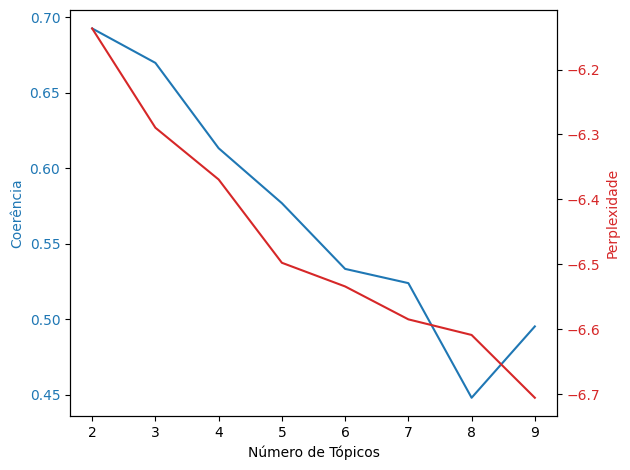

In [ ]:
def compute_coherence_perplexity_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        lda_model, coherence, perplexity = train_lda_and_evaluate(dictionary, corpus, texts, num_topics)
        coherence_values.append(coherence)
        perplexity_values.append(perplexity)
    return coherence_values, perplexity_values

limit = 10; start = 2; step = 1
coherence_values, perplexity_values = compute_coherence_perplexity_values(dictionary, corpus, processed_texts, start=start, limit=limit, step=step)

# Mostrar gráficos
fig, ax1 = plt.subplots()

ax1.set_xlabel('Número de Tópicos')
ax1.set_ylabel('Coerência', color='tab:blue')
ax1.plot(range(start, limit, step), coherence_values, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Perplexidade', color='tab:red')
ax2.plot(range(start, limit, step), perplexity_values, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()


###Visualização dos Resultados

###Interpretação do Intertopic Distance Map
Círculos Representando Tópicos:

Cada círculo no gráfico representa um tópico identificado pelo modelo LDA.
O tamanho do círculo indica a prevalência do tópico em todo o corpus de documentos. Tópicos maiores são mais comuns.

### Distância Entre Círculos:

A distância entre os círculos representa a similaridade entre os tópicos. Tópicos que estão próximos uns dos outros são mais similares em termos de palavras e conteúdo, enquanto tópicos distantes são menos similares.
O gráfico usa a técnica de Multidimensional Scaling (MDS) para reduzir as dimensões dos dados e posicionar os tópicos em um plano bidimensional (2D).

### Relevância das Palavras (Barra Lateral Direita):

Quando você clica em um círculo (tópico), a barra lateral à direita exibe as palavras mais relevantes para esse tópico.
As palavras são classificadas por relevância, que é uma combinação de sua frequência no tópico e sua exclusividade em relação a outros tópicos.
Lambda (
𝜆
λ) Slider:

O controle deslizante lambda (
𝜆
λ) ajusta o peso da relevância das palavras.
𝜆
=
1.0
λ=1.0 classifica as palavras pela probabilidade de frequência no tópico (palavras mais comuns).
𝜆
=
0.0
λ=0.0 classifica as palavras pela relevância exclusiva para o tópico em questão (palavras que aparecem frequentemente apenas nesse tópico).
Ajustar o
𝜆
λ ajuda a explorar as palavras-chave que definem melhor cada tópico.

###Relação Barra Vermelha x Azul

Quanto maior a parte vermelha em relação ao azul, mais exclusiva ou relevante essa palavra é para o tópico.

Se a barra for toda azul e quase nada vermelha, significa que essa palavra aparece muito em outros tópicos também (menos representativa daquele tópico).

Se a barra for quase toda vermelha, essa palavra é fortemente associada ao tópico selecionado.

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
